In [1]:
# Imports
import json
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression 
from sklearn.metrics import (
                            mean_absolute_error, mean_squared_error, r2_score, 
                            accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                            )
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
print("✅ Imports loaded")

✅ Imports loaded


In [2]:
ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = Path("artifacts/figures")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
X_train_reg_views = np.load(ARTIFACTS_DIR / 'X_train_reg_Views.npz')['data']
X_test_reg_views = np.load(ARTIFACTS_DIR / 'X_test_reg_Views.npz')['data']
y_train_reg_views = np.load(ARTIFACTS_DIR / 'y_train_reg_Views.npz')['data']
y_test_reg_views = np.load(ARTIFACTS_DIR / 'y_test_reg_Views.npz')['data']

X_train_reg_likes = np.load(ARTIFACTS_DIR / 'X_train_reg_Likes.npz')['data']
X_test_reg_likes = np.load(ARTIFACTS_DIR / 'X_test_reg_Likes.npz')['data']
y_train_reg_likes = np.load(ARTIFACTS_DIR / 'y_train_reg_Likes.npz')['data']
y_test_reg_likes = np.load(ARTIFACTS_DIR / 'y_test_reg_Likes.npz')['data']

X_train_reg_comments = np.load(ARTIFACTS_DIR / 'X_train_reg_Comments.npz')['data']
X_test_reg_comments = np.load(ARTIFACTS_DIR / 'X_test_reg_Comments.npz')['data']
y_train_reg_comments = np.load(ARTIFACTS_DIR / 'y_train_reg_Comments.npz')['data']
y_test_reg_comments = np.load(ARTIFACTS_DIR / 'y_test_reg_Comments.npz')['data']

X_train_reg_shares = np.load(ARTIFACTS_DIR / 'X_train_reg_Shares.npz')['data']
X_test_reg_shares = np.load(ARTIFACTS_DIR / 'X_test_reg_Shares.npz')['data']
y_train_reg_shares = np.load(ARTIFACTS_DIR / 'y_train_reg_Shares.npz')['data']
y_test_reg_shares = np.load(ARTIFACTS_DIR / 'y_test_reg_Shares.npz')['data']

X_train_cls = np.load(ARTIFACTS_DIR / 'X_train_cls_classification.npz')['data']
X_test_cls = np.load(ARTIFACTS_DIR / 'X_test_cls_classification.npz')['data']
y_train_cls = np.load(ARTIFACTS_DIR / 'y_train_cls_classification.npz')['data']
y_test_cls = np.load(ARTIFACTS_DIR / 'y_test_cls_classification.npz')['data']




print("Regression arrays loaded for Views:")
print(f"   X_train : {X_train_reg_views.shape}, X_test : {X_test_reg_views.shape}")
print(f"   y_train : {y_train_reg_views.shape}, y_test : {y_test_reg_views.shape}")

print("Regression arrays loaded for Likes:")
print(f"   X_train : {X_train_reg_likes.shape}, X_test : {X_test_reg_likes.shape}")
print(f"   y_train : {y_train_reg_likes.shape}, y_test : {y_test_reg_likes.shape}")

print("Regression arrays loaded for Shares:")
print(f"   X_train : {X_train_reg_shares.shape}, X_test : {X_test_reg_shares.shape}")
print(f"   y_train : {y_train_reg_shares.shape}, y_test : {y_test_reg_shares.shape}")

print("Regression arrays loaded for Comments:")
print(f"   X_train : {X_train_reg_comments.shape}, X_test : {X_test_reg_comments.shape}")
print(f"   y_train : {y_train_reg_comments.shape}, y_test : {y_test_reg_comments.shape}")

print("\nClassification arrays loaded:")
print(f"   X_train : {X_train_cls.shape}, X_test : {X_test_cls.shape}")
print(f"   y_train : {y_train_cls.shape}, y_test : {y_test_cls.shape}")


# Load FEATURE NAMES

with open(ARTIFACTS_DIR / "feature_names-classification.json", "r") as f:
    feature_names_cls = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Views.json", "r") as f:
    feature_names_reg_views = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Likes.json", "r") as f:
    feature_names_reg_likes = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Shares.json", "r") as f:
    feature_names_reg_shares = json.load(f)

with open(ARTIFACTS_DIR / "feature_names-Comments.json", "r") as f:
    feature_names_reg_comments = json.load(f)
    




# TODO : Implement confusion matrix visualization function

Regression arrays loaded for Views:
   X_train : (3784, 54), X_test : (946, 54)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Likes:
   X_train : (3784, 55), X_test : (946, 55)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Shares:
   X_train : (3784, 56), X_test : (946, 56)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Comments:
   X_train : (3784, 57), X_test : (946, 57)
   y_train : (3784,), y_test : (946,)

Classification arrays loaded:
   X_train : (3784, 54), X_test : (946, 54)
   y_train : (3784,), y_test : (946,)


In [4]:
X_train_df = pd.DataFrame(X_train_reg_views)
X_train_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-0.785723,0.468561,1.979219,1.791705,-1.031785,-1.294538,-1.405355,1.197827,1.185397,1.495032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.573057,-1.786181,-0.883814,1.551390,0.718034,-0.471216,1.755303,0.035870,0.843764,-0.426336,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.589055,-1.786181,1.979219,0.562334,0.718034,-1.294538,-1.454774,0.035870,1.185397,0.866634,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.923092,-1.786181,0.014246,-0.139697,0.718034,-1.684183,0.012497,0.035870,-2.247489,0.577066,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.246234,0.735380,0.014246,-1.100668,-0.956804,-1.684183,-0.773091,0.369740,-2.247489,1.248302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.243388,0.470941,-0.883814,-0.066416,1.200298,-0.471216,-0.124690,-1.496268,0.843764,-1.561615,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96,0.573057,-1.786181,-0.608507,1.551390,0.718034,0.681186,1.755303,0.035870,0.858001,-0.426336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,-0.246234,0.470941,-0.131382,-1.100668,1.200298,1.269466,-0.773091,-1.496268,-0.093228,1.248302,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98,0.573057,0.735380,-0.883814,1.551390,-0.956804,-0.471216,1.755303,0.369740,0.843764,-0.426336,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
y_train_df = pd.DataFrame(y_train_reg_views)
y_train_df.head(100)

,0
0,826021
1,338623
2,4754509
3,4892331
4,3399161
...,...
95,4290567
96,459654
97,3079923
98,4171736


## Regression Baseline

In [6]:
class SupervisedBaselineModels:
    def __init__(self, X_train, X_test, y_train, y_test, feature_names, task):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.task = task
        
        # Baseline Regression Models
        self.reg_models = {
            'LinearRegression': LinearRegression(),
            'Ridge_1': Ridge(alpha=1, random_state=RANDOM_STATE),
            'Ridge_10': Ridge(alpha=10, random_state=RANDOM_STATE),
            'Ridge_100': Ridge(alpha=100, random_state=RANDOM_STATE),
        }
        
        # Baseline Classification Models
        self.cls_models = {
            'LogisticRegression': LogisticRegression(
                multi_class='multinomial',
                max_iter=200,
                random_state=RANDOM_STATE
            ),
            'DecisionTree': DecisionTreeClassifier(
                max_depth=6,
                random_state=RANDOM_STATE
            ),
        }
        
        self.reg_results = []
        self.cls_results = []
        
        
    # -------------------------------------------------
    # TRAIN & EVALUATE
    # -------------------------------------------------
    def train_and_evaluate(self):
        
        # -------------------------------------------------
        # REGRESSION
        # -------------------------------------------------
        if self.task == 'regression':
            for name, model in self.reg_models.items():
                print(f"\n🔵 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_mae = mean_absolute_error(self.y_train, y_pred_train)
                test_mae = mean_absolute_error(self.y_test, y_pred_test)

                train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
                test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))

                train_r2 = r2_score(self.y_train, y_pred_train)
                test_r2 = r2_score(self.y_test, y_pred_test)

                # Save Results
                self.reg_results.append({
                    'Model': name,
                    'Train MAE': train_mae,
                    'Train RMSE': train_rmse,
                    'Train R2': train_r2,
                    'Test MAE': test_mae,
                    'Test RMSE': test_rmse,   # FIXED
                    'Test R2': test_r2
                })

                print(f"   Test MAE: {test_mae:.2f} | Test RMSE: {test_rmse:.2f} | Test R2: {test_r2:.2f}")

        
        # -------------------------------------------------
        # CLASSIFICATION
        # -------------------------------------------------
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                print(f"\n🟢 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_acc = accuracy_score(self.y_train, y_pred_train)
                test_acc = accuracy_score(self.y_test, y_pred_test)

                train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
                test_precision = precision_score(self.y_test, y_pred_test, average='weighted')

                train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
                test_recall = recall_score(self.y_test, y_pred_test, average='weighted')

                train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')
                test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

                # Save Results
                self.cls_results.append({
                    'Model': name,
                    'Train Accuracy': train_acc,
                    'Train Precision': train_precision,
                    'Train Recall': train_recall,
                    'Train F1 Score': train_f1,
                    'Test Accuracy': test_acc,
                    'Test Precision': test_precision,
                    'Test Recall': test_recall,
                    'Test F1 Score': test_f1
                })

                # FIXED PRINT LINE (Recall label corrected)
                print(f"   Test Accuracy: {test_acc:.2f} | Test Precision: {test_precision:.2f} | Test Recall: {test_recall:.2f} | Test F1: {test_f1:.2f}")

                if name == 'DecisionTree':
                    print("Tree depth:", model.get_depth())
                    print("Leaves:", model.get_n_leaves())

    # -------------------------------------------------
    # RESULTS DISPLAY & SAVE
    # -------------------------------------------------
    def results(self):
        
        # -------------------------------------------------
        # REGRESSION RESULTS
        # -------------------------------------------------
        if self.task == 'regression':
            df_reg = pd.DataFrame(self.reg_results)
            print("\n📘 Regression Baseline Results:")
            print(df_reg.to_string(index=False))

            with open(ARTIFACTS_DIR / "metrics_baseline_regression.json", "w") as f:
                json.dump(df_reg.to_dict(orient="records"), f, indent=2)
        
        # -------------------------------------------------
        # CLASSIFICATION RESULTS
        # -------------------------------------------------
        if self.task == 'classification':
            df_cls = pd.DataFrame(self.cls_results)
            print("\n📗 Classification Baseline Results:")
            print(df_cls.to_string(index=False))

            with open(ARTIFACTS_DIR / "metrics_baseline_classification.json", "w") as f:
                json.dump(df_cls.to_dict(orient="records"), f, indent=2)
                
            
                
                
    def feature_importance(self):
        # -------------------------------------------------
        # FEATURE IMPORTANCE
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                
                if hasattr(model, 'coef_'):
                    coefficients = np.abs(model.coef_)
                
                elif hasattr(model, 'feature_importances_'):
                    coefficients = np.abs(model.feature_importances_)
                
                mean_coefficients = coefficients.mean(axis=0)
    
                # Create a DataFrame to display the feature importance
                feature_importance = pd.DataFrame({
                    'Feature': self.feature_names,
                    'Importance': mean_coefficients
                })

                # Sort the features by importance
                feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
                
                print(feature_importance)
                
                # Visualize top 10 most important features
                plt.figure(figsize=(8, 6))
                feature_importance.nlargest(20, 'Importance').plot(
                    kind='barh', x='Feature', y='Importance',
                    legend=False, color='skyblue')

                plt.title("Top 10 Feature Importances (Logistic Regression)")
                plt.xlabel("Importance Score")
                plt.ylabel("Feature")
                plt.grid(axis='x', linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.savefig(FIGURES_DIR / f'feature_importances_{name}.png')
                plt.show()


                    
        if self.task == 'regression':
            for name, model in self.reg_models.items():
                coefficients = np.abs(model.coef_)
                mean_coefficients = coefficients.mean(axis=0)
                # Create a DataFrame to display the feature importance
                feature_importance = pd.DataFrame({
                    'Feature': self.feature_names,
                    'Importance': mean_coefficients
                })

                # Sort the features by importance
                feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
                
                print(feature_importance)
                
                # Visualize top 10 most important features
                plt.figure(figsize=(8, 6))
                feature_importance.nlargest(50, 'Importance').plot(
                    kind='barh', x='Feature', y='Importance',
                    legend=False, color='skyblue')

                plt.title("Top 10 Feature Importances (Logistic Regression)")
                plt.xlabel("Importance Score")
                plt.ylabel("Feature")
                plt.grid(axis='x', linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.savefig(FIGURES_DIR / f'feature_importances_{name}.png')
                plt.show()



=== Regression Baseline Models on Views ===

🔵 Training LinearRegression ...
   Test MAE: 607624.88 | Test RMSE: 704919.62 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 608841.44 | Test RMSE: 706503.75 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 608900.10 | Test RMSE: 706578.45 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 610087.44 | Test RMSE: 708078.62 | Test R2: 0.75

📘 Regression Baseline Results:
           Model     Train MAE    Train RMSE  Train R2      Test MAE     Test RMSE  Test R2
LinearRegression 593678.932875 686704.126278  0.752308 607624.883721 704919.621020 0.750469
         Ridge_1 592952.818032 686301.801317  0.752598 608841.437049 706503.745237 0.749347
        Ridge_10 592980.536370 686309.857672  0.752592 608900.101105 706578.450507 0.749294
       Ridge_100 593653.335573 687052.712536  0.752057 610087.435374 708078.624207 0.748228
                     Feature    Importance
0          Hashtag_Avg_Views  2.775318e+18
40          Region_Au

<Figure size 800x600 with 0 Axes>

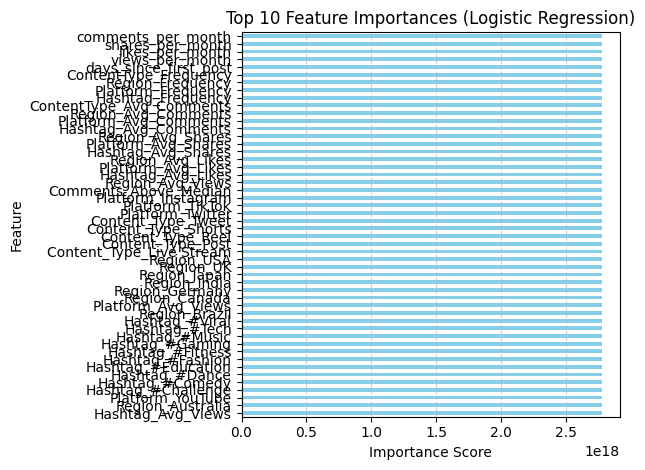

                     Feature    Importance
0          Hashtag_Avg_Views  37136.052948
40          Region_Australia  37136.052948
29          Platform_YouTube  37136.052948
30        Hashtag_#Challenge  37136.052948
31           Hashtag_#Comedy  37136.052948
32            Hashtag_#Dance  37136.052948
33        Hashtag_#Education  37136.052948
34          Hashtag_#Fashion  37136.052948
35          Hashtag_#Fitness  37136.052948
36           Hashtag_#Gaming  37136.052948
37            Hashtag_#Music  37136.052948
38             Hashtag_#Tech  37136.052948
39            Hashtag_#Viral  37136.052948
41             Region_Brazil  37136.052948
1         Platform_Avg_Views  37136.052948
42             Region_Canada  37136.052948
43            Region_Germany  37136.052948
44              Region_India  37136.052948
45              Region_Japan  37136.052948
46                 Region_UK  37136.052948
47                Region_USA  37136.052948
48  Content_Type_Live Stream  37136.052948
49         

<Figure size 800x600 with 0 Axes>

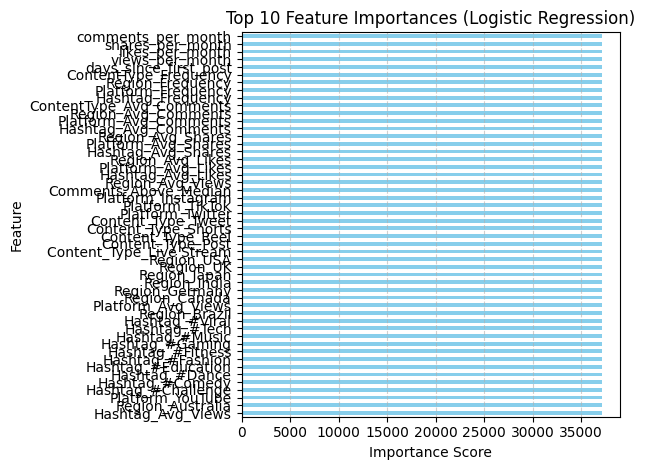

                     Feature    Importance
0          Hashtag_Avg_Views  36875.120961
40          Region_Australia  36875.120961
29          Platform_YouTube  36875.120961
30        Hashtag_#Challenge  36875.120961
31           Hashtag_#Comedy  36875.120961
32            Hashtag_#Dance  36875.120961
33        Hashtag_#Education  36875.120961
34          Hashtag_#Fashion  36875.120961
35          Hashtag_#Fitness  36875.120961
36           Hashtag_#Gaming  36875.120961
37            Hashtag_#Music  36875.120961
38             Hashtag_#Tech  36875.120961
39            Hashtag_#Viral  36875.120961
41             Region_Brazil  36875.120961
1         Platform_Avg_Views  36875.120961
42             Region_Canada  36875.120961
43            Region_Germany  36875.120961
44              Region_India  36875.120961
45              Region_Japan  36875.120961
46                 Region_UK  36875.120961
47                Region_USA  36875.120961
48  Content_Type_Live Stream  36875.120961
49         

<Figure size 800x600 with 0 Axes>

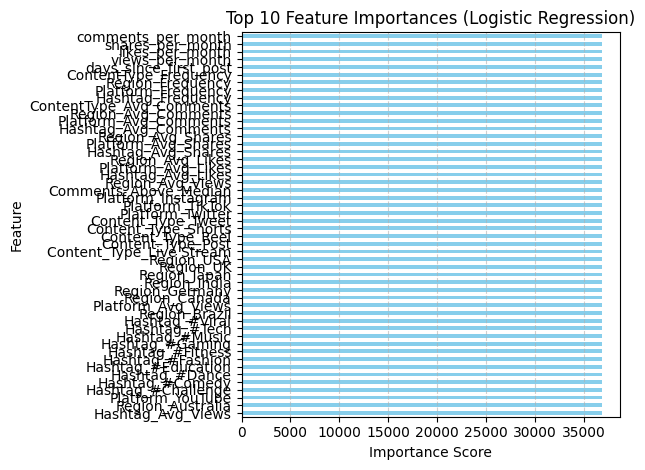

                     Feature    Importance
0          Hashtag_Avg_Views  34656.764339
40          Region_Australia  34656.764339
29          Platform_YouTube  34656.764339
30        Hashtag_#Challenge  34656.764339
31           Hashtag_#Comedy  34656.764339
32            Hashtag_#Dance  34656.764339
33        Hashtag_#Education  34656.764339
34          Hashtag_#Fashion  34656.764339
35          Hashtag_#Fitness  34656.764339
36           Hashtag_#Gaming  34656.764339
37            Hashtag_#Music  34656.764339
38             Hashtag_#Tech  34656.764339
39            Hashtag_#Viral  34656.764339
41             Region_Brazil  34656.764339
1         Platform_Avg_Views  34656.764339
42             Region_Canada  34656.764339
43            Region_Germany  34656.764339
44              Region_India  34656.764339
45              Region_Japan  34656.764339
46                 Region_UK  34656.764339
47                Region_USA  34656.764339
48  Content_Type_Live Stream  34656.764339
49         

<Figure size 800x600 with 0 Axes>

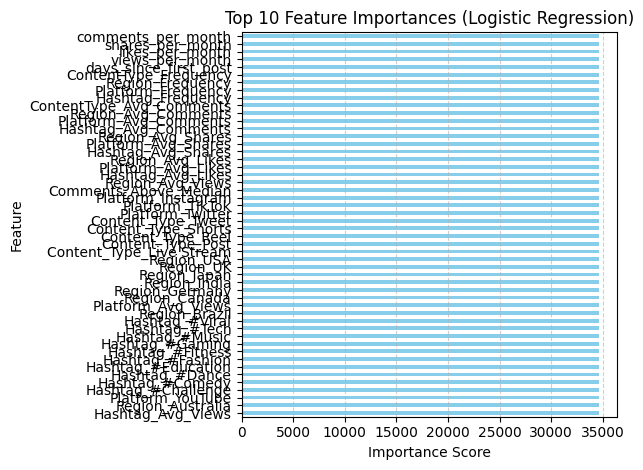


=== Regression Baseline Models on Likes ===

🔵 Training LinearRegression ...
   Test MAE: 62997.13 | Test RMSE: 72519.27 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 62997.16 | Test RMSE: 72520.23 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 62998.23 | Test RMSE: 72529.09 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 63023.19 | Test RMSE: 72686.47 | Test R2: 0.75

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE  Test R2
LinearRegression 62399.830091 72065.311392  0.749063 62997.132796 72519.270109 0.753081
         Ridge_1 62399.764473 72065.340957  0.749062 62997.158944 72520.230831 0.753074
        Ridge_10 62400.211441 72066.135397  0.749057 62998.228995 72529.088519 0.753014
       Ridge_100 62432.649002 72140.598980  0.748538 63023.191343 72686.469800 0.751941
                     Feature    Importance
0                      Views  2.462191e+15
41          Region_Australia  2.462191e+15
30    

<Figure size 800x600 with 0 Axes>

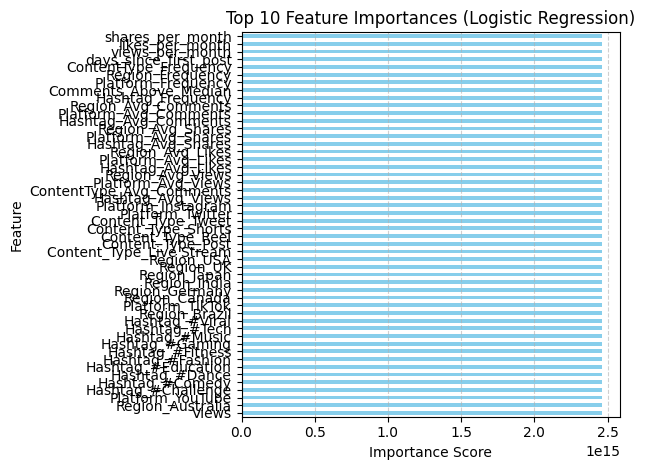

                     Feature   Importance
0                      Views  3509.699455
41          Region_Australia  3509.699455
30          Platform_YouTube  3509.699455
31        Hashtag_#Challenge  3509.699455
32           Hashtag_#Comedy  3509.699455
33            Hashtag_#Dance  3509.699455
34        Hashtag_#Education  3509.699455
35          Hashtag_#Fashion  3509.699455
36          Hashtag_#Fitness  3509.699455
37           Hashtag_#Gaming  3509.699455
38            Hashtag_#Music  3509.699455
39             Hashtag_#Tech  3509.699455
40            Hashtag_#Viral  3509.699455
42             Region_Brazil  3509.699455
28           Platform_TikTok  3509.699455
43             Region_Canada  3509.699455
44            Region_Germany  3509.699455
45              Region_India  3509.699455
46              Region_Japan  3509.699455
47                 Region_UK  3509.699455
48                Region_USA  3509.699455
49  Content_Type_Live Stream  3509.699455
50         Content_Type_Post  3509

<Figure size 800x600 with 0 Axes>

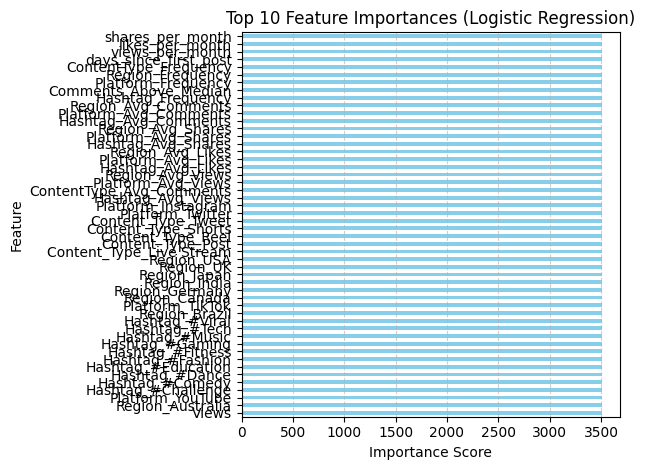

                     Feature   Importance
0                      Views  3487.762546
41          Region_Australia  3487.762546
30          Platform_YouTube  3487.762546
31        Hashtag_#Challenge  3487.762546
32           Hashtag_#Comedy  3487.762546
33            Hashtag_#Dance  3487.762546
34        Hashtag_#Education  3487.762546
35          Hashtag_#Fashion  3487.762546
36          Hashtag_#Fitness  3487.762546
37           Hashtag_#Gaming  3487.762546
38            Hashtag_#Music  3487.762546
39             Hashtag_#Tech  3487.762546
40            Hashtag_#Viral  3487.762546
42             Region_Brazil  3487.762546
28           Platform_TikTok  3487.762546
43             Region_Canada  3487.762546
44            Region_Germany  3487.762546
45              Region_India  3487.762546
46              Region_Japan  3487.762546
47                 Region_UK  3487.762546
48                Region_USA  3487.762546
49  Content_Type_Live Stream  3487.762546
50         Content_Type_Post  3487

<Figure size 800x600 with 0 Axes>

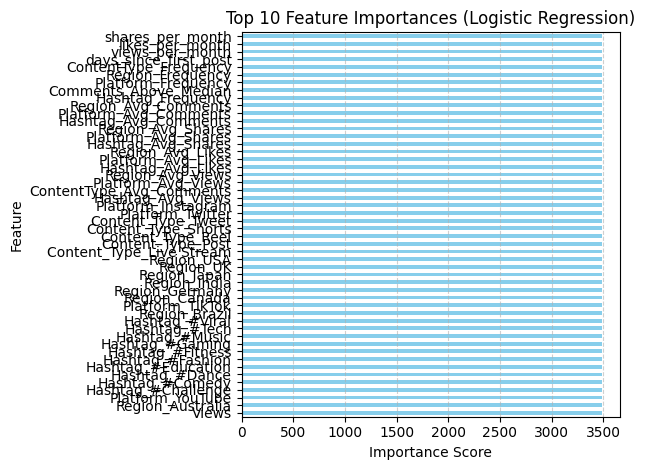

                     Feature   Importance
0                      Views  3297.025719
41          Region_Australia  3297.025719
30          Platform_YouTube  3297.025719
31        Hashtag_#Challenge  3297.025719
32           Hashtag_#Comedy  3297.025719
33            Hashtag_#Dance  3297.025719
34        Hashtag_#Education  3297.025719
35          Hashtag_#Fashion  3297.025719
36          Hashtag_#Fitness  3297.025719
37           Hashtag_#Gaming  3297.025719
38            Hashtag_#Music  3297.025719
39             Hashtag_#Tech  3297.025719
40            Hashtag_#Viral  3297.025719
42             Region_Brazil  3297.025719
28           Platform_TikTok  3297.025719
43             Region_Canada  3297.025719
44            Region_Germany  3297.025719
45              Region_India  3297.025719
46              Region_Japan  3297.025719
47                 Region_UK  3297.025719
48                Region_USA  3297.025719
49  Content_Type_Live Stream  3297.025719
50         Content_Type_Post  3297

<Figure size 800x600 with 0 Axes>

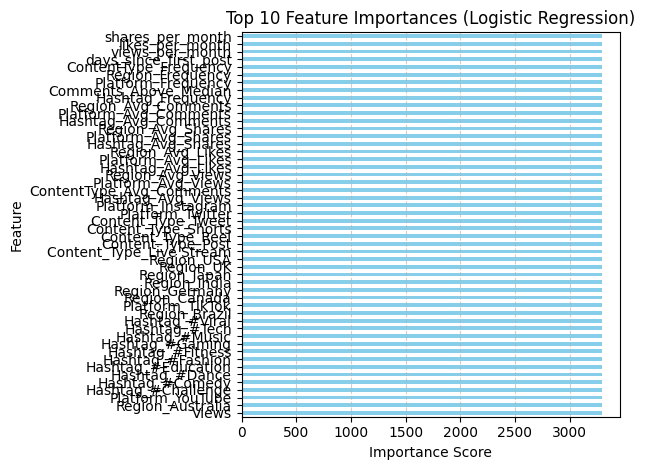


=== Regression Baseline Models on Comments ===

🔵 Training LinearRegression ...
   Test MAE: 6320.45 | Test RMSE: 7334.05 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 6326.67 | Test RMSE: 7342.08 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 6327.14 | Test RMSE: 7343.22 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 6335.42 | Test RMSE: 7361.36 | Test R2: 0.74

📘 Regression Baseline Results:
           Model   Train MAE  Train RMSE  Train R2    Test MAE   Test RMSE  Test R2
LinearRegression 6143.816068 7142.703566  0.748201 6320.451374 7334.049598 0.746780
         Ridge_1 6142.522247 7141.372164  0.748295 6326.669568 7342.075956 0.746225
        Ridge_10 6142.725615 7141.450536  0.748290 6327.138015 7343.220089 0.746146
       Ridge_100 6148.422889 7148.788575  0.747772 6335.423159 7361.362684 0.744890
                     Feature    Importance
0                      Views  1.684595e+16
29        Platform_Instagram  1.684595e+16
31          Platform_Twitter  1

<Figure size 800x600 with 0 Axes>

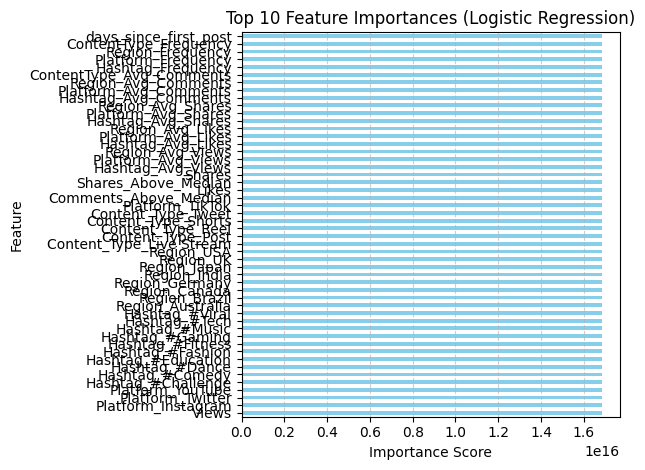

                     Feature  Importance
0                      Views  320.124554
29        Platform_Instagram  320.124554
31          Platform_Twitter  320.124554
32          Platform_YouTube  320.124554
33        Hashtag_#Challenge  320.124554
34           Hashtag_#Comedy  320.124554
35            Hashtag_#Dance  320.124554
36        Hashtag_#Education  320.124554
37          Hashtag_#Fashion  320.124554
38          Hashtag_#Fitness  320.124554
39           Hashtag_#Gaming  320.124554
40            Hashtag_#Music  320.124554
41             Hashtag_#Tech  320.124554
42            Hashtag_#Viral  320.124554
43          Region_Australia  320.124554
44             Region_Brazil  320.124554
45             Region_Canada  320.124554
46            Region_Germany  320.124554
47              Region_India  320.124554
48              Region_Japan  320.124554
49                 Region_UK  320.124554
50                Region_USA  320.124554
51  Content_Type_Live Stream  320.124554
52         Conte

<Figure size 800x600 with 0 Axes>

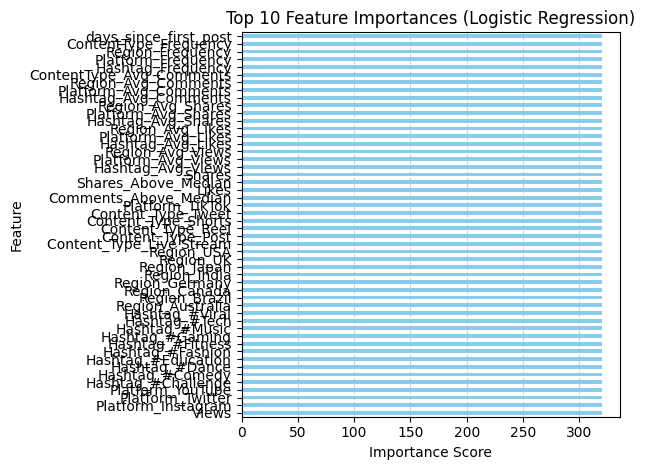

                     Feature  Importance
0                      Views  317.870109
29        Platform_Instagram  317.870109
31          Platform_Twitter  317.870109
32          Platform_YouTube  317.870109
33        Hashtag_#Challenge  317.870109
34           Hashtag_#Comedy  317.870109
35            Hashtag_#Dance  317.870109
36        Hashtag_#Education  317.870109
37          Hashtag_#Fashion  317.870109
38          Hashtag_#Fitness  317.870109
39           Hashtag_#Gaming  317.870109
40            Hashtag_#Music  317.870109
41             Hashtag_#Tech  317.870109
42            Hashtag_#Viral  317.870109
43          Region_Australia  317.870109
44             Region_Brazil  317.870109
45             Region_Canada  317.870109
46            Region_Germany  317.870109
47              Region_India  317.870109
48              Region_Japan  317.870109
49                 Region_UK  317.870109
50                Region_USA  317.870109
51  Content_Type_Live Stream  317.870109
52         Conte

<Figure size 800x600 with 0 Axes>

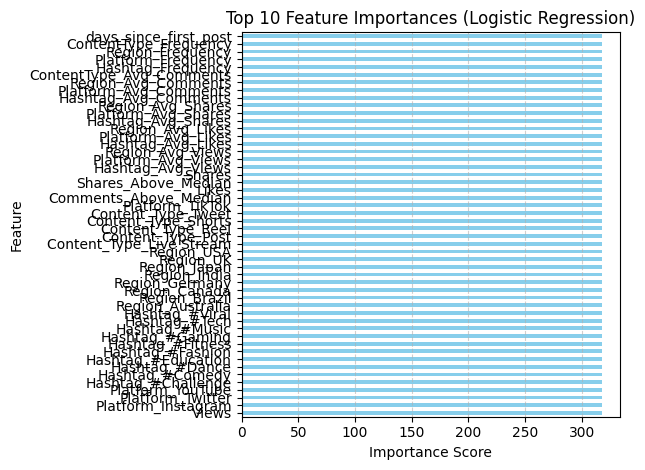

                     Feature  Importance
0                      Views  298.588318
29        Platform_Instagram  298.588318
31          Platform_Twitter  298.588318
32          Platform_YouTube  298.588318
33        Hashtag_#Challenge  298.588318
34           Hashtag_#Comedy  298.588318
35            Hashtag_#Dance  298.588318
36        Hashtag_#Education  298.588318
37          Hashtag_#Fashion  298.588318
38          Hashtag_#Fitness  298.588318
39           Hashtag_#Gaming  298.588318
40            Hashtag_#Music  298.588318
41             Hashtag_#Tech  298.588318
42            Hashtag_#Viral  298.588318
43          Region_Australia  298.588318
44             Region_Brazil  298.588318
45             Region_Canada  298.588318
46            Region_Germany  298.588318
47              Region_India  298.588318
48              Region_Japan  298.588318
49                 Region_UK  298.588318
50                Region_USA  298.588318
51  Content_Type_Live Stream  298.588318
52         Conte

<Figure size 800x600 with 0 Axes>

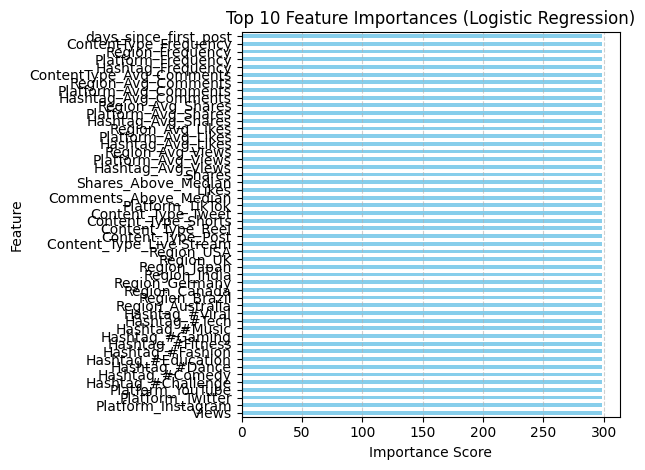


=== Regression Baseline Models on Shares ===

🔵 Training LinearRegression ...
   Test MAE: 12448.23 | Test RMSE: 14404.71 | Test R2: 0.75

🔵 Training Ridge_1 ...
   Test MAE: 12447.81 | Test RMSE: 14390.28 | Test R2: 0.75

🔵 Training Ridge_10 ...
   Test MAE: 12449.80 | Test RMSE: 14390.60 | Test R2: 0.75

🔵 Training Ridge_100 ...
   Test MAE: 12473.63 | Test RMSE: 14406.58 | Test R2: 0.75

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE  Test R2
LinearRegression 12433.807082 14402.556037  0.754775 12448.228330 14404.706714 0.751230
         Ridge_1 12430.952055 14395.916259  0.755001 12447.807826 14390.278409 0.751728
        Ridge_10 12431.904575 14396.072025  0.754996 12449.797112 14390.596889 0.751717
       Ridge_100 12448.057287 14410.831889  0.754493 12473.634780 14406.582884 0.751165
                     Feature    Importance
0                      Views  4.696401e+16
1                      Likes  4.696401e+16
30   

<Figure size 800x600 with 0 Axes>

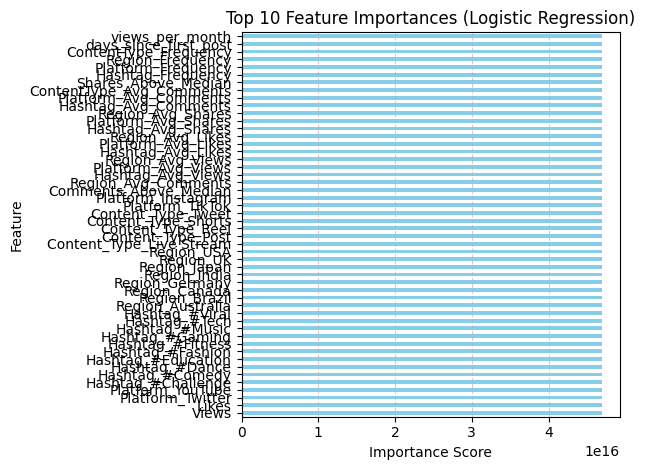

                     Feature  Importance
0                      Views  636.601495
1                      Likes  636.601495
30          Platform_Twitter  636.601495
31          Platform_YouTube  636.601495
32        Hashtag_#Challenge  636.601495
33           Hashtag_#Comedy  636.601495
34            Hashtag_#Dance  636.601495
35        Hashtag_#Education  636.601495
36          Hashtag_#Fashion  636.601495
37          Hashtag_#Fitness  636.601495
38           Hashtag_#Gaming  636.601495
39            Hashtag_#Music  636.601495
40             Hashtag_#Tech  636.601495
41            Hashtag_#Viral  636.601495
42          Region_Australia  636.601495
43             Region_Brazil  636.601495
44             Region_Canada  636.601495
45            Region_Germany  636.601495
46              Region_India  636.601495
47              Region_Japan  636.601495
48                 Region_UK  636.601495
49                Region_USA  636.601495
50  Content_Type_Live Stream  636.601495
51         Conte

<Figure size 800x600 with 0 Axes>

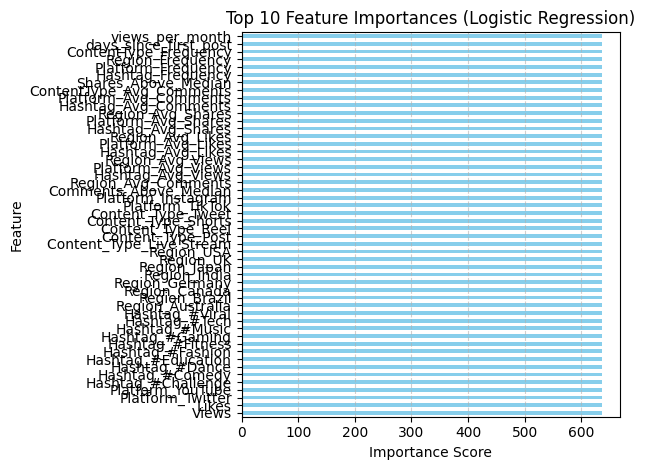

                     Feature  Importance
0                      Views  633.491495
1                      Likes  633.491495
30          Platform_Twitter  633.491495
31          Platform_YouTube  633.491495
32        Hashtag_#Challenge  633.491495
33           Hashtag_#Comedy  633.491495
34            Hashtag_#Dance  633.491495
35        Hashtag_#Education  633.491495
36          Hashtag_#Fashion  633.491495
37          Hashtag_#Fitness  633.491495
38           Hashtag_#Gaming  633.491495
39            Hashtag_#Music  633.491495
40             Hashtag_#Tech  633.491495
41            Hashtag_#Viral  633.491495
42          Region_Australia  633.491495
43             Region_Brazil  633.491495
44             Region_Canada  633.491495
45            Region_Germany  633.491495
46              Region_India  633.491495
47              Region_Japan  633.491495
48                 Region_UK  633.491495
49                Region_USA  633.491495
50  Content_Type_Live Stream  633.491495
51         Conte

<Figure size 800x600 with 0 Axes>

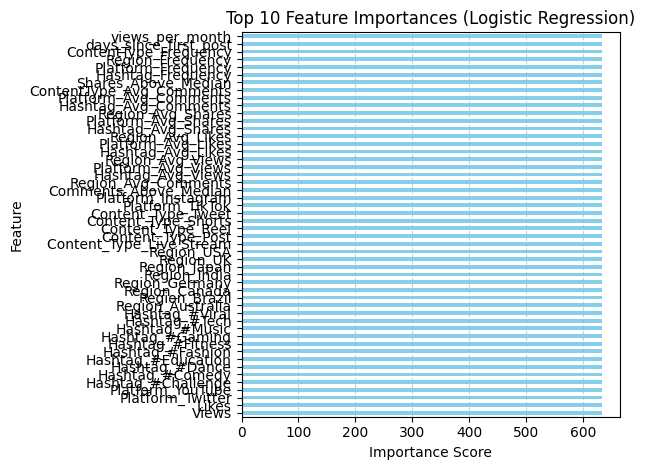

                     Feature  Importance
0                      Views  606.049136
1                      Likes  606.049136
30          Platform_Twitter  606.049136
31          Platform_YouTube  606.049136
32        Hashtag_#Challenge  606.049136
33           Hashtag_#Comedy  606.049136
34            Hashtag_#Dance  606.049136
35        Hashtag_#Education  606.049136
36          Hashtag_#Fashion  606.049136
37          Hashtag_#Fitness  606.049136
38           Hashtag_#Gaming  606.049136
39            Hashtag_#Music  606.049136
40             Hashtag_#Tech  606.049136
41            Hashtag_#Viral  606.049136
42          Region_Australia  606.049136
43             Region_Brazil  606.049136
44             Region_Canada  606.049136
45            Region_Germany  606.049136
46              Region_India  606.049136
47              Region_Japan  606.049136
48                 Region_UK  606.049136
49                Region_USA  606.049136
50  Content_Type_Live Stream  606.049136
51         Conte

<Figure size 800x600 with 0 Axes>

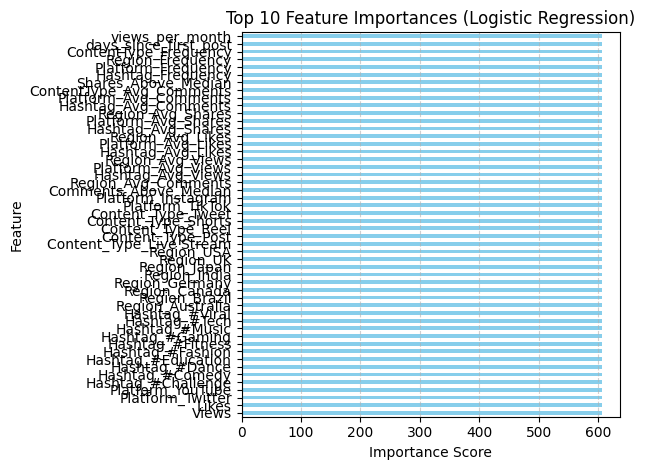


=== Classification Baseline Models ===

🟢 Training LogisticRegression ...
   Test Accuracy: 0.72 | Test Precision: 0.69 | Test Recall: 0.72 | Test F1: 0.69

🟢 Training DecisionTree ...
   Test Accuracy: 0.72 | Test Precision: 0.69 | Test Recall: 0.72 | Test F1: 0.70
Tree depth: 6
Leaves: 47

📗 Classification Baseline Results:
             Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score  Test Accuracy  Test Precision  Test Recall  Test F1 Score
LogisticRegression        0.758192         0.729354      0.758192        0.728910       0.720930        0.686521     0.720930       0.691173
      DecisionTree        0.774049         0.752563      0.774049        0.753923       0.719873        0.690284     0.719873       0.697000
                     Feature  Importance
23        Likes_Above_Median    1.673306
22        Views_Above_Median    1.036143
24       Shares_Above_Median    0.292730
52        Content_Type_Tweet    0.132307
25     Comments_Above_Median    0.115376
37

<Figure size 800x600 with 0 Axes>

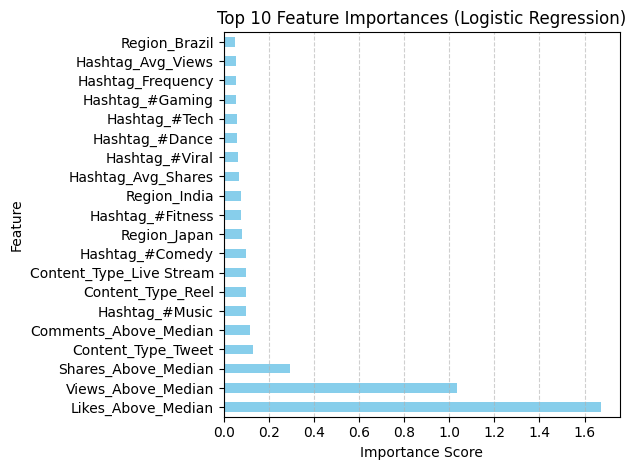

                     Feature  Importance
0          Hashtag_Avg_Views    0.018519
40          Region_Australia    0.018519
29          Platform_YouTube    0.018519
30        Hashtag_#Challenge    0.018519
31           Hashtag_#Comedy    0.018519
32            Hashtag_#Dance    0.018519
33        Hashtag_#Education    0.018519
34          Hashtag_#Fashion    0.018519
35          Hashtag_#Fitness    0.018519
36           Hashtag_#Gaming    0.018519
37            Hashtag_#Music    0.018519
38             Hashtag_#Tech    0.018519
39            Hashtag_#Viral    0.018519
41             Region_Brazil    0.018519
1         Platform_Avg_Views    0.018519
42             Region_Canada    0.018519
43            Region_Germany    0.018519
44              Region_India    0.018519
45              Region_Japan    0.018519
46                 Region_UK    0.018519
47                Region_USA    0.018519
48  Content_Type_Live Stream    0.018519
49         Content_Type_Post    0.018519
50         Conte

<Figure size 800x600 with 0 Axes>

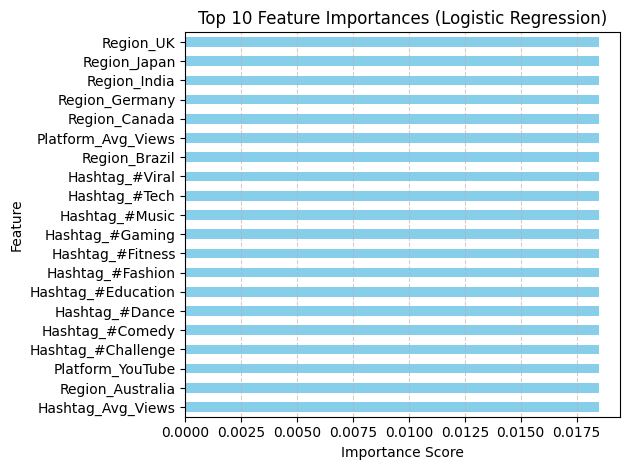

In [7]:
# Regression Models on Views
print("\n=== Regression Baseline Models on Views ===")
reg_views_model = SupervisedBaselineModels(X_train_reg_views, X_test_reg_views, y_train_reg_views, y_test_reg_views, feature_names_reg_views, task='regression')
reg_views_model.train_and_evaluate()
reg_views_model.results()
reg_views_model.feature_importance()

# Regression Models on Likes
print("\n=== Regression Baseline Models on Likes ===")
reg_likes_model = SupervisedBaselineModels(X_train_reg_likes, X_test_reg_likes, y_train_reg_likes, y_test_reg_likes, feature_names_reg_likes, task='regression')
reg_likes_model.train_and_evaluate()
reg_likes_model.results()
reg_likes_model.feature_importance()

# Regression Models on Comments
print("\n=== Regression Baseline Models on Comments ===")
reg_comments_model = SupervisedBaselineModels(X_train_reg_comments, X_test_reg_comments, y_train_reg_comments, y_test_reg_comments, feature_names_reg_comments, task='regression')
reg_comments_model.train_and_evaluate()
reg_comments_model.results()
reg_comments_model.feature_importance()

# Regression Models on Shares
print("\n=== Regression Baseline Models on Shares ===")
reg_shares_model = SupervisedBaselineModels(X_train_reg_shares, X_test_reg_shares, y_train_reg_shares, y_test_reg_shares, feature_names_reg_shares, task='regression')
reg_shares_model.train_and_evaluate()
reg_shares_model.results()
reg_shares_model.feature_importance()

# Classification Models
print("\n=== Classification Baseline Models ===")
cls_model = SupervisedBaselineModels(X_train_cls, X_test_cls, y_train_cls, y_test_cls, feature_names_cls, task='classification')
cls_model.train_and_evaluate()  
cls_model.results()
cls_model.feature_importance()